In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Assignment1-data.csv')

In [4]:
df

,Unnamed: 0,Open,High,Low,Close
0,2017-09-01 10:00:00,3079,3079,3072,3074
1,2017-09-01 10:10:00,3074,3074,3073,3074
2,2017-09-01 10:20:00,3074,3074,3072,3072
3,2017-09-01 10:30:00,3072,3073,3072,3073
4,2017-09-01 10:40:00,3073,3074,3072,3072
...,...,...,...,...,...
1695,2017-09-29 22:30:00,3382,3386,3378,3378
1696,2017-09-29 22:40:00,3378,3379,3367,3372
1697,2017-09-29 22:50:00,3372,3375,3371,3373
1698,2017-09-29 23:00:00,3373,3379,3368,3376


In [5]:
df.isna().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
dtype: int64

# TR

In [6]:
tr1 = pd.DataFrame(df['High'] - df['Low'])
tr2 = pd.DataFrame(abs(df['High'] - df['Close'].shift(1)))
tr3 = pd.DataFrame(abs(df['Low'] -  df['Close'].shift(1)))
frames = [tr1, tr2, tr3]

tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1).rename('TR')
tr[0] = None

df = pd.concat([df, tr], axis = 1, join='inner')
df

,Unnamed: 0,Open,High,Low,Close,TR
0,2017-09-01 10:00:00,3079,3079,3072,3074,NaN
1,2017-09-01 10:10:00,3074,3074,3073,3074,1.0
2,2017-09-01 10:20:00,3074,3074,3072,3072,2.0
3,2017-09-01 10:30:00,3072,3073,3072,3073,1.0
4,2017-09-01 10:40:00,3073,3074,3072,3072,2.0
...,...,...,...,...,...,...
1695,2017-09-29 22:30:00,3382,3386,3378,3378,8.0
1696,2017-09-29 22:40:00,3378,3379,3367,3372,12.0
1697,2017-09-29 22:50:00,3372,3375,3371,3373,4.0
1698,2017-09-29 23:00:00,3373,3379,3368,3376,11.0


# +DM 1

In [7]:
plus_dm1 = pd.DataFrame(df['High'] - df['High'].shift(1))
plus_dm2 = pd.DataFrame(df['Low'].shift(1) - df['Low'])

frames = pd.concat([plus_dm1, plus_dm2], axis=1)

def flag_plus_dm(frames):
    if(frames['High'] > frames['Low']):
        return max(frames['High'], 0)
    else:
        return 0

plus_dm = frames.apply(flag_plus_dm, axis=1).rename('+DM1')
plus_dm[0] = None

df = pd.concat([df, plus_dm], axis = 1, join='inner')
df

,Unnamed: 0,Open,High,Low,Close,TR,+DM1
0,2017-09-01 10:00:00,3079,3079,3072,3074,NaN,NaN
1,2017-09-01 10:10:00,3074,3074,3073,3074,1.0,0.0
2,2017-09-01 10:20:00,3074,3074,3072,3072,2.0,0.0
3,2017-09-01 10:30:00,3072,3073,3072,3073,1.0,0.0
4,2017-09-01 10:40:00,3073,3074,3072,3072,2.0,1.0
...,...,...,...,...,...,...,...
1695,2017-09-29 22:30:00,3382,3386,3378,3378,8.0,0.0
1696,2017-09-29 22:40:00,3378,3379,3367,3372,12.0,0.0
1697,2017-09-29 22:50:00,3372,3375,3371,3373,4.0,0.0
1698,2017-09-29 23:00:00,3373,3379,3368,3376,11.0,4.0


# -DM 1

In [8]:
plus_dm1 = pd.DataFrame(df['Low'].shift(1) - df['Low'])
plus_dm2 = pd.DataFrame(df['High'] - df['High'].shift(1))

frames = pd.concat([plus_dm1, plus_dm2], axis=1)

def flag_plus_dm(frames):
    if(frames['Low'] > frames['High']):
        return max(frames['Low'], 0)
    else:
        return 0

plus_dm = frames.apply(flag_plus_dm, axis=1).rename('-DM1')
plus_dm[0] = None

df = pd.concat([df, plus_dm], axis = 1, join='inner')


# TR14, +DM14 and -DM14

In [9]:
n = np.zeros(len(df))

# TR14
c = df.loc[1:14, ["TR"]].sum(axis=0)
d = pd.Series(c)
m = pd.Series(n).rename('TR14')
m.iloc[0:14] = None
m[14] = d['TR']
m = pd.concat([df['TR'], m], axis = 1, join='inner')

# +DM14
dm1 = df.loc[1:14, ["+DM1"]].sum(axis=0)
dm2 = pd.Series(dm1)
dm = pd.Series(n).rename("+DM14")
dm.iloc[0:14] = None
dm[14] = dm2["+DM1"]
dm = pd.concat([df["+DM1"], dm], axis = 1, join='inner')

# -DM14
dm4 = df.loc[1:14, ["-DM1"]].sum(axis=0)
dm5 = pd.Series(dm4)
minus_dm = pd.Series(n).rename('-DM14')
minus_dm.iloc[0:14] = None
minus_dm[14] = dm5["-DM1"]
minus_dm = pd.concat([df["-DM1"], minus_dm], axis = 1, join='inner')

for i in range(15, len(df)):
    m['TR14'].loc[i:len(df)+1] = (m['TR14'].shift(1) - (m['TR14'].shift(1) / 14) + m['TR']).round(decimals = 2)
    dm["+DM14"].loc[i:len(df)+1] = (dm["+DM14"].shift(1) - (dm['+DM14'].shift(1) / 14) + dm['+DM1']).round(decimals = 2)
    minus_dm['-DM14'].loc[i:len(df)+1] = (minus_dm["-DM14"].shift(1) - (minus_dm['-DM14'].shift(1) / 14) + minus_dm['-DM1']).round(decimals = 2)

df = pd.concat([df, m['TR14']], axis = 1, join='inner')
df = pd.concat([df, dm['+DM14']], axis = 1, join='inner')
df = pd.concat([df, minus_dm['-DM14']], axis = 1, join='inner')
df

,Unnamed: 0,Open,High,Low,Close,TR,+DM1,-DM1,TR14,+DM14,-DM14
0,2017-09-01 10:00:00,3079,3079,3072,3074,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-09-01 10:10:00,3074,3074,3073,3074,1.0,0.0,0.0,NaN,NaN,NaN
2,2017-09-01 10:20:00,3074,3074,3072,3072,2.0,0.0,1.0,NaN,NaN,NaN
3,2017-09-01 10:30:00,3072,3073,3072,3073,1.0,0.0,0.0,NaN,NaN,NaN
4,2017-09-01 10:40:00,3073,3074,3072,3072,2.0,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1695,2017-09-29 22:30:00,3382,3386,3378,3378,8.0,0.0,2.0,116.45,31.52,17.03
1696,2017-09-29 22:40:00,3378,3379,3367,3372,12.0,0.0,11.0,120.13,29.27,26.81
1697,2017-09-29 22:50:00,3372,3375,3371,3373,4.0,0.0,0.0,115.55,27.18,24.90
1698,2017-09-29 23:00:00,3373,3379,3368,3376,11.0,4.0,0.0,118.30,29.24,23.12


# +DI14, -DI14, DI14 Difference, DI14 Sum and Dx

In [10]:
# +DI14
plus_di = pd.Series(n).rename('+DI14')
plus_di.iloc[0:14] = None

# -DI14
minus_di = pd.Series(n).rename('-DI14')
minus_di.iloc[0:14] = None

# DI14 Difference
di_diff = pd.Series(n).rename('DI14 Diff')
di_diff.iloc[0:14] = None

# DI14 Sum
di_sum = pd.Series(n).rename('DI14 Sum')
di_sum.iloc[0:14] = None

# DX
dx = pd.Series(n).rename('DX')
dx.iloc[0:14] = None

for i in range(14, len(df)):
    plus_di['+DI14'] = (100 * (df['+DM14'] / df['TR14'])).round(decimals = 2)
    minus_di['-DI14'] = (100 * (df['-DM14'] / df['TR14'])).round(decimals = 2)
    di_diff['DI14 Diff'] = abs(plus_di['+DI14'] - minus_di['-DI14']).round(decimals = 2)
    di_sum['DI14 Sum'] = (plus_di['+DI14'] + minus_di['-DI14']).round(decimals = 2)
    dx['DX'] = (100 * (di_diff['DI14 Diff'] / di_sum['DI14 Sum'])).round(decimals = 2)

plus = pd.DataFrame()
plus = plus_di['+DI14'].rename('+DI14')

minus = pd.DataFrame()
minus = minus_di['-DI14'].rename('-DI14')

diff = pd.DataFrame()
diff = di_diff['DI14 Diff'].rename('DI14 Diff')
    
sum1 = pd.DataFrame()
sum1 = di_sum['DI14 Sum'].rename('DI14 Sum')

dx2 = pd.DataFrame()
dx2 = dx['DX'].rename('DX')

df = pd.concat([df, plus], axis = 1, join='inner')
df = pd.concat([df, minus], axis = 1, join='inner')
df = pd.concat([df, diff], axis = 1, join='inner')
df = pd.concat([df, sum1], axis = 1, join='inner')
df = pd.concat([df, dx2], axis = 1, join='inner')


# ADX

In [11]:
adx1 = df.loc[14:27, ["DX"]].mean(axis=0)
adx2 = pd.Series(adx1)
adx = pd.Series(n).rename('ADX')
adx.iloc[0:27] = None
adx[27] = adx2['DX']
adx = pd.concat([df['DX'], adx], axis = 1, join='inner')

for i in range(28, len(df)):
    adx['ADX'].iloc[i:len(df)] = ( ((adx['ADX'].shift(1) * 13) + df['DX'] ) / 14 ).round(decimals = 2)
    
df = pd.concat([df, adx['ADX']], axis = 1, join='inner')


In [12]:
df.rename(columns={'Unnamed: 0':'Time'}, inplace=True)
df

,Time,Open,High,Low,Close,TR,+DM1,-DM1,TR14,+DM14,-DM14,+DI14,-DI14,DI14 Diff,DI14 Sum,DX,ADX
0,2017-09-01 10:00:00,3079,3079,3072,3074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-09-01 10:10:00,3074,3074,3073,3074,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-09-01 10:20:00,3074,3074,3072,3072,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-09-01 10:30:00,3072,3073,3072,3073,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-09-01 10:40:00,3073,3074,3072,3072,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2017-09-29 22:30:00,3382,3386,3378,3378,8.0,0.0,2.0,116.45,31.52,17.03,27.07,14.62,12.45,41.69,29.86,19.08
1696,2017-09-29 22:40:00,3378,3379,3367,3372,12.0,0.0,11.0,120.13,29.27,26.81,24.37,22.32,2.05,46.69,4.39,18.03
1697,2017-09-29 22:50:00,3372,3375,3371,3373,4.0,0.0,0.0,115.55,27.18,24.90,23.52,21.55,1.97,45.07,4.37,17.05
1698,2017-09-29 23:00:00,3373,3379,3368,3376,11.0,4.0,0.0,118.30,29.24,23.12,24.72,19.54,5.18,44.26,11.70,16.67


# Convert to .csv file format

In [12]:
df.to_csv('solution.csv', index=False, header=True)
new_df = pd.read_csv('solution.csv')
new_df

,Time,Open,High,Low,Close,TR,+DM1,-DM1,TR14,+DM14,-DM14,+DI14,-DI14,DI14 Diff,DI14 Sum,DX,ADX
0,2017-09-01 10:00:00,3079,3079,3072,3074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-09-01 10:10:00,3074,3074,3073,3074,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-09-01 10:20:00,3074,3074,3072,3072,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-09-01 10:30:00,3072,3073,3072,3073,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-09-01 10:40:00,3073,3074,3072,3072,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2017-09-29 22:30:00,3382,3386,3378,3378,8.0,0.0,2.0,116.45,31.52,17.03,27.07,14.62,12.45,41.69,29.86,19.08
1696,2017-09-29 22:40:00,3378,3379,3367,3372,12.0,0.0,11.0,120.13,29.27,26.81,24.37,22.32,2.05,46.69,4.39,18.03
1697,2017-09-29 22:50:00,3372,3375,3371,3373,4.0,0.0,0.0,115.55,27.18,24.90,23.52,21.55,1.97,45.07,4.37,17.05
1698,2017-09-29 23:00:00,3373,3379,3368,3376,11.0,4.0,0.0,118.30,29.24,23.12,24.72,19.54,5.18,44.26,11.70,16.67


# Plot

<function matplotlib.pyplot.show(*args, **kw)>

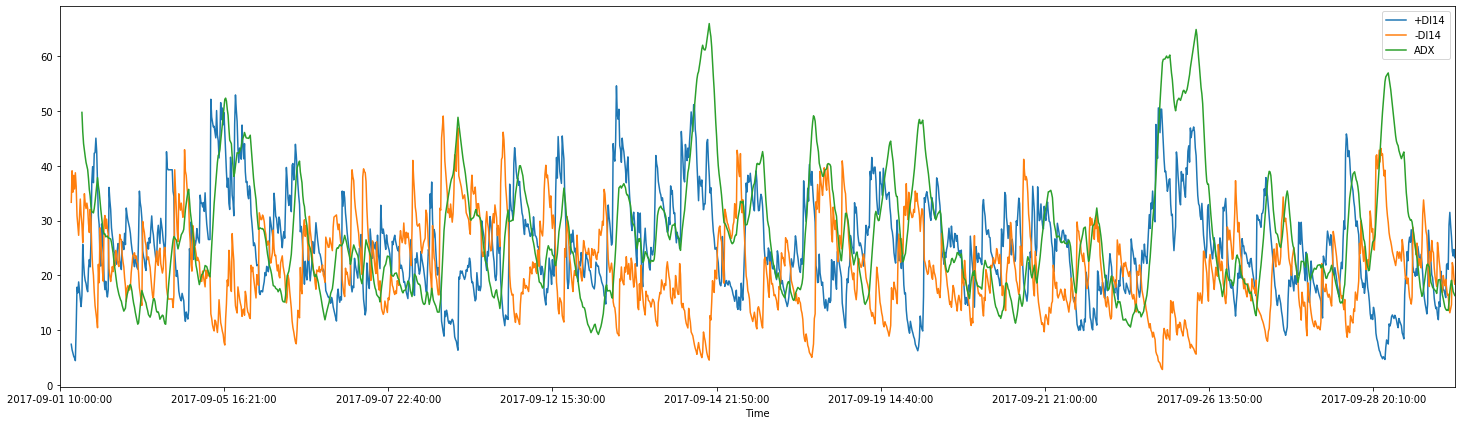

In [14]:
import matplotlib.pyplot as mp

df.plot(x="Time", y=["+DI14", "-DI14", "ADX"], kind="line", figsize=(25, 7))

mp.show